<a href="https://colab.research.google.com/github/sayandeepmajumdar/iris_classfication_google_colab/blob/master/Iris_Classification_GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Iris Classification**

Import needed library in Python

In [0]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from joblib import dump, load

Loading the Dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
iris_class      150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Explore and visualize the data

In [15]:
dataset.describe()
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
y = dataset['iris_class']
x = dataset.drop(['iris_class'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

dataset :  (150, 5)
x :  (150, 4)
y :  (150,)


we will use a Multi-Layer Perceptron (MLP) Classifier. We need to encode our target attribute for Neural Network based classifier into one hot format

In [17]:
y=pd.get_dummies(y)
y.sample(7)

,Iris-setosa,Iris-versicolor,Iris-virginica
94,0,1,0
47,1,0,0
74,0,1,0
80,0,1,0
121,0,0,1
45,1,0,0
50,0,1,0


Preprocess the data

In [18]:

#Selective import Scikit Learn 
from sklearn.model_selection import train_test_split

# Generate Training and Validation Sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 data as data test

#converting to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

#print data split for validation
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(105, 4) (105, 3)
(45, 4) (45, 3)


Select an algorithm and train the model

In [22]:
#Importing our model
from sklearn.neural_network import MLPClassifier

#model initialization
Model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, alpha=0.01, #try change hidden layer
                     solver='sgd', verbose=1,  random_state=121) #try verbode=0 to train with out logging
#train our model
h=Model.fit(x_train,y_train)
#use our model to predict
y_pred=Model.predict(x_test)
print(y_pred)

Iteration 1, loss = 2.54491592
Iteration 2, loss = 2.50673771
Iteration 3, loss = 2.45734456
Iteration 4, loss = 2.40045797
Iteration 5, loss = 2.34060884
Iteration 6, loss = 2.28098455
Iteration 7, loss = 2.22441802
Iteration 8, loss = 2.17154553
Iteration 9, loss = 2.12319162
Iteration 10, loss = 2.07985162
Iteration 11, loss = 2.04179189
Iteration 12, loss = 2.00898545
Iteration 13, loss = 1.98128490
Iteration 14, loss = 1.95941650
Iteration 15, loss = 1.94193152
Iteration 16, loss = 1.92833723
Iteration 17, loss = 1.91812835
Iteration 18, loss = 1.91052674
Iteration 19, loss = 1.90512404
Iteration 20, loss = 1.90140618
Iteration 21, loss = 1.89852366
Iteration 22, loss = 1.89571225
Iteration 23, loss = 1.89276517
Iteration 24, loss = 1.88952978
Iteration 25, loss = 1.88591745
Iteration 26, loss = 1.88197663
Iteration 27, loss = 1.87789633
Iteration 28, loss = 1.87359714
Iteration 29, loss = 1.86909081
Iteration 30, loss = 1.86440430
Iteration 31, loss = 1.85955362
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [20]:
#scikit for machine learning reporting
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred)) # Print summary report
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Print Confusion matrix 
print('accuracy is ',accuracy_score(y_pred,y_test)) # Print accuracy score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.83      1.00      0.91        15

   micro avg       0.94      0.98      0.96        45
   macro avg       0.94      0.98      0.96        45
weighted avg       0.94      0.98      0.96        45
 samples avg       0.96      0.98      0.96        45

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
accuracy is  0.9333333333333333


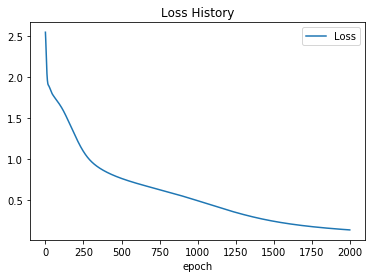

In [21]:
import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])